In [1]:
import tensorflow as tf

In [2]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D,LeakyReLU, SpatialDropout2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam,AdamW

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import seaborn as sns
import os

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Emotion Detection.zip to Emotion Detection.zip


In [5]:
import zipfile

zip_path = "/content/Emotion Detection.zip"
extract_path = "/content/emotion_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



In [6]:
import os

base_dir = "/content/emotion_data"
for root, dirs, files in os.walk(base_dir):
    for name in dirs:
        print("📁", os.path.join(root, name))



📁 /content/emotion_data/DataSet for Emotion Detection
📁 /content/emotion_data/DataSet for Emotion Detection/train_data
📁 /content/emotion_data/DataSet for Emotion Detection/test_data
📁 /content/emotion_data/DataSet for Emotion Detection/single_prediction
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/neutral
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/sad
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/angry
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/happy
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/surprise
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/disgust
📁 /content/emotion_data/DataSet for Emotion Detection/train_data/fear
📁 /content/emotion_data/DataSet for Emotion Detection/test_data/neutral
📁 /content/emotion_data/DataSet for Emotion Detection/test_data/sad
📁 /content/emotion_data/DataSet for Emotion Detection/test_data/angry
📁 /content/emotion_data/DataSet fo

In [7]:
train_path = "/content/emotion_data/DataSet for Emotion Detection/train_data"
test_path = "/content/emotion_data/DataSet for Emotion Detection/test_data"

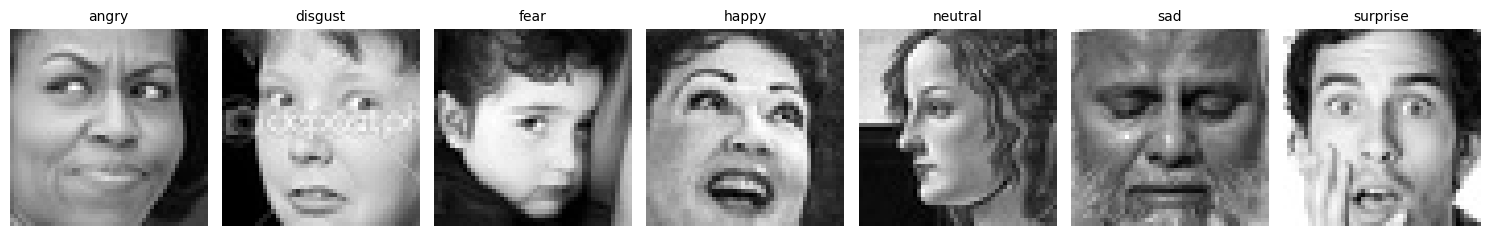

In [8]:
# Path to your training dataset
base_path = "/content/emotion_data/DataSet for Emotion Detection/train_data"
class_names = sorted(os.listdir(base_path))  # Get class names

plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(base_path, class_name)
    image_files = os.listdir(class_dir)

    if not image_files:
        continue  # skip if folder is empty

    img_path = os.path.join(class_dir, image_files[0])  # 1st image from class
    img = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = img_to_array(img)

    plt.subplot(1, 7, idx + 1)
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
# 3------------- Use this :Train accuracy: 0.7060 - loss: 1.0356 - val_accuracy: 0.67-----------------------
cnn = Sequential()

# Conv Block 1
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu',input_shape=(48,48,1)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

# Conv Block 2
cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

# Conv Block 3
cnn.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

# Conv Block 4
cnn.add(Conv2D(512, (3,3), padding='same', activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Conv Block 5
cnn.add(Conv2D(512, (3,3), padding='same', activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# 1 -----------train Accuracy = 59.70 and test Accuracy = 61----------------
# cnn = Sequential()

# cnn.add(Conv2D(32, (3,3), padding='same', activation='relu',
#                  input_shape=(48,48,1)))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 2
# cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 3
# cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 4
# cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 5
# cnn.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())


# -----------------------------------------------------------

# 2-----------Train Accuracy: 0.5997 - Test accuracy: 0.6228 --------

# cnn = Sequential()

# cnn.add(Conv2D(64, (3,3), padding='same', activation='relu',input_shape=(48,48,1)))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 2
# cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 3
# cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 4
# cnn.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 5
# cnn.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# cnn.add(BatchNormalization())


# -----------------------------------------------------------

# 4------------accuracy: 0.6593- val_accuracy: 0.6629------------

# cnn = Sequential()

# # Conv Block 1
# cnn.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 2
# cnn.add(Conv2D(128, (3,3), padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))

# # Conv Block 3
# cnn.add(Conv2D(256, (3,3), padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(BatchNormalization())
# cnn.add(SpatialDropout2D(0.3))

# # Conv Block 4
# cnn.add(Conv2D(512, (3,3), padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(BatchNormalization())
# cnn.add(MaxPooling2D(2,2))
# cnn.add(Dropout(0.3))

# # Conv Block 5
# cnn.add(Conv2D(512, (3,3), padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))

# # Additional Conv Block
# cnn.add(Conv2D(512, (3,3), padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))


In [31]:
# cnn.add(Flatten())
cnn.add(GlobalAveragePooling2D())

In [32]:
# 3------------- Use this :Train accuracy: 0.7060 - loss: 1.0356 - val_accuracy: 0.67-----------------------

cnn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

cnn.add(Dense(7, activation='softmax'))

# ----------------------------------------------------------------------

In [33]:
# 1---------------train Accuracy = 59.70 and test Accuracy = 61-----------
# # Dense Layers
# cnn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.4))

# cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.4))

# cnn.add(Dense(7, activation='softmax'))   # 7 emotion classes
# ----------------------------------------------------------------------


# 2---------------accuracy: 0.5997  - val_accuracy: 0.6228 --------
# # Dense Layers
# cnn.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))

# cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))


# cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))

# cnn.add(Dense(7, activation='softmax'))   # 7 emotion classes



# 4--------------accuracy: 0.6593  val_accuracy: 0.6629----------------

# # Dense Layers
# cnn.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.4))

# cnn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))

# # Final Output Layer
# cnn.add(Dense(7, activation='softmax'))  # 7 emotion classes


In [34]:

# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

opt = Adam(learning_rate=0.0003)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
cnn.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [35]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 4,049,671 (15.45 MB)

 Trainable params: 4,046,215 (15.44 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [36]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=20, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, verbose=1)
]


In [37]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48, 48),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(48, 48),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels),
                                     y=labels)
class_weights_dict = dict(enumerate(class_weights))




Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [38]:
# 3------------- Use this :Train accuracy: 0.7060 - loss: 1.0356 - val_accuracy: 0.67-----------------------
history=cnn.fit(train_generator,validation_data=test_generator,epochs=100,class_weight=class_weights_dict,callbacks=callbacks)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 48s 42ms/step - accuracy: 0.1663 - loss: 2.3826 - val_accuracy: 0.2181 - val_loss: 2.0065 - learning_rate: 3.0000e-04
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.2105 - loss: 2.1152 - val_accuracy: 0.1411 - val_loss: 3.8523 - learning_rate: 3.0000e-04
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.2730 - loss: 1.9505 - val_accuracy: 0.3152 - val_loss: 1.8692 - learning_rate: 3.0000e-04
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.3531 - loss: 1.7847 - val_accuracy: 0.3835 - val_loss: 1.7831 - learning_rate: 3.0000e-04
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.3993 - loss: 1.6777 - val_accuracy: 0.4329 - val_loss: 1.6698 - learning_rate: 3.0000e-04
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.4375 - loss: 1.6041 - val_accuracy: 0.5007 - val_loss: 1.4853 - learning_rate: 3.0000e-04
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - a

In [19]:
# 4--------------accuracy: 0.6593  val_accuracy: 0.6629----------------
# history=cnn.fit(train_generator,validation_data=test_generator,epochs=80,class_weight=class_weights_dict,callbacks=callbacks)

In [41]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# load & preprocess
img = load_img(r'/content/emotion_data/DataSet for Emotion Detection/single_prediction/happy.jpg', target_size=(48, 48), color_mode='grayscale')
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)          # (1, 48, 48, 1)

# predict
probs   = cnn.predict(img_array)                       # shape (1, 7)
idx     = np.argmax(probs, axis=1)[0]                  # highest‑probability column
label   = {v:k for k,v in train_generator.class_indices.items()}[idx]

print(f"Predicted index : {idx}")
print(f"Predicted label : {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted index : 3
Predicted label : happy


In [42]:
# Predict on test data
Y_pred = cnn.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


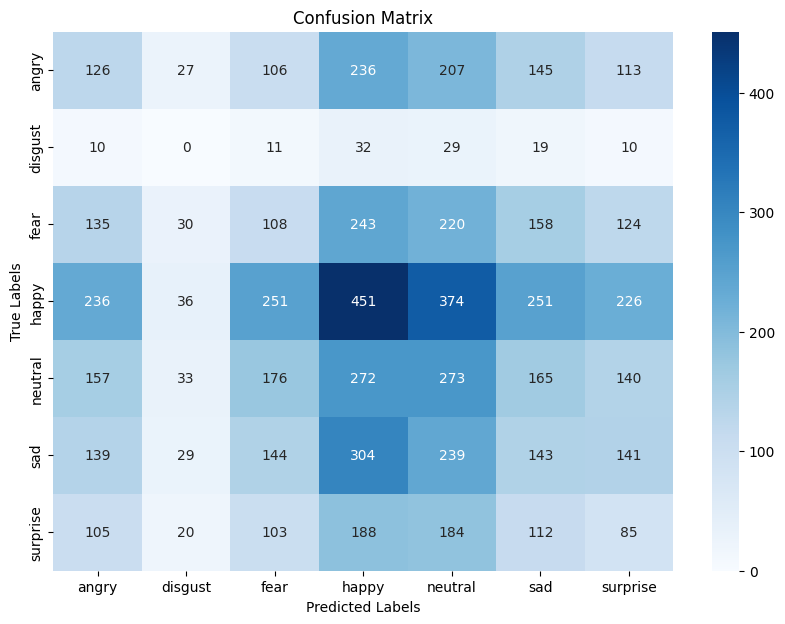

In [43]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Plot it
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


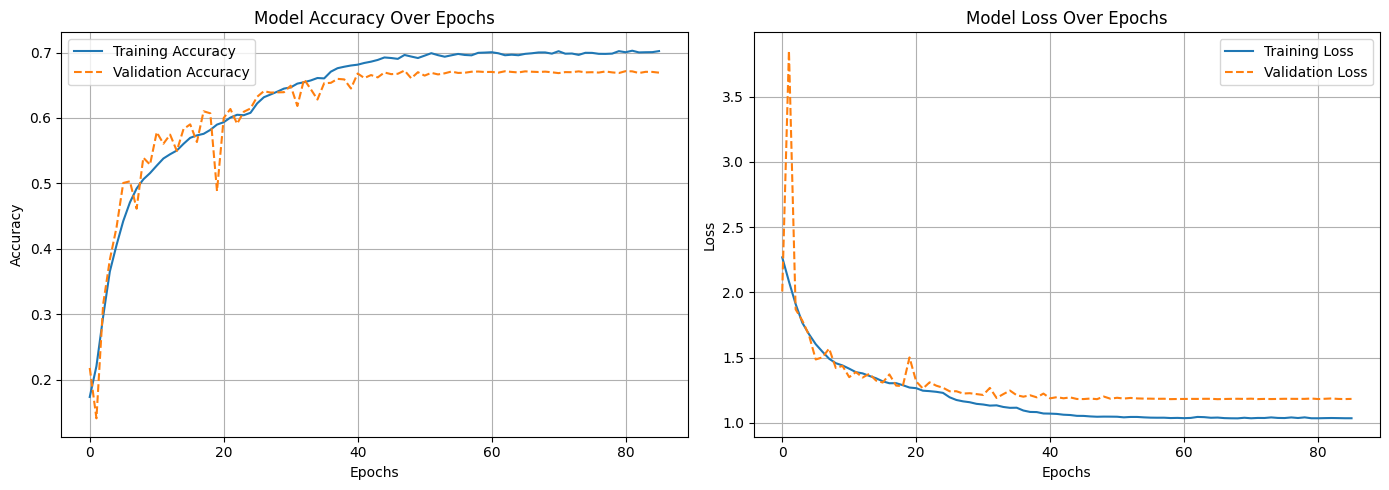

In [44]:

# Accuracy plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [45]:
cnn.save('Uzair-Emotion_model.h5')

In [46]:
from google.colab import files
files.download('Uzair-Emotion_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>